In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

In [51]:
df= pd.read_csv("DWDclean.csv")
df.head()

,Avg Temperature,Humidity,Rainfall mm,N Rating,P Rating,K Rating,OC Rating,pH Average,Crop_Type,Productivity Matrix
0,30.0,82.0,3300.0,1.0,1.0,0.0,4.0,6.0,Arecanut,Low
1,25.0,79.0,3293.0,1.0,1.0,0.0,4.0,6.0,Arecanut,Low
2,25.0,79.0,1778.0,1.0,1.0,0.0,3.0,6.0,Arecanut,Low
3,25.0,79.0,1778.0,2.0,1.0,2.0,3.0,4.0,Arecanut,High
4,25.0,79.0,3805.0,3.0,0.0,2.0,4.0,4.0,Arecanut,High


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg Temperature      659 non-null    float64
 1   Humidity             659 non-null    float64
 2   Rainfall mm          659 non-null    float64
 3   N Rating             650 non-null    float64
 4   P Rating             659 non-null    float64
 5   K Rating             658 non-null    float64
 6   OC Rating            659 non-null    float64
 7   pH Average           660 non-null    float64
 8   Crop_Type            660 non-null    object 
 9   Productivity Matrix  660 non-null    object 
dtypes: float64(8), object(2)
memory usage: 51.7+ KB


In [54]:
#replacing null values with median
df['Avg Temperature'].fillna((df['Avg Temperature'].median()), inplace=True)
df['Humidity'].fillna((df['Humidity'].median()), inplace=True)
df['Rainfall mm'].fillna((df['Rainfall mm'].median()), inplace=True)
df['pH Average'].fillna((df['pH Average'].median()), inplace=True)
df['N Rating'].fillna((df['N Rating'].median()), inplace=True)
df['P Rating'].fillna((df['P Rating'].median()), inplace=True)
df['K Rating'].fillna((df['K Rating'].median()), inplace=True)
df['OC Rating'].fillna((df['OC Rating'].median()), inplace=True)
labels = df["Productivity Matrix"].unique()
labels = df["Crop_Type"].unique()
df

,Avg Temperature,Humidity,Rainfall mm,N Rating,P Rating,K Rating,OC Rating,pH Average,Crop_Type,Productivity Matrix
0,30.0,82.0,3300.0,1.0,1.0,0.0,4.0,6.00,Arecanut,Low
1,25.0,79.0,3293.0,1.0,1.0,0.0,4.0,6.00,Arecanut,Low
2,25.0,79.0,1778.0,1.0,1.0,0.0,3.0,6.00,Arecanut,Low
3,25.0,79.0,1778.0,2.0,1.0,2.0,3.0,4.00,Arecanut,High
4,25.0,79.0,3805.0,3.0,0.0,2.0,4.0,4.00,Arecanut,High
...,...,...,...,...,...,...,...,...,...,...
655,27.2,59.0,890.0,2.0,2.0,3.0,0.0,7.85,Wheat,Low
656,26.0,59.0,725.8,0.0,2.0,3.0,0.0,7.85,Wheat,Low
657,28.0,67.0,1439.0,0.0,2.0,3.0,4.0,7.85,Wheat,Low
658,28.0,69.0,2458.0,2.0,2.0,3.0,0.0,7.85,Wheat,Low


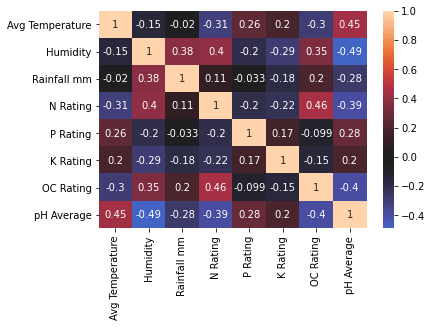

In [55]:
plt.figure()
sns.heatmap(df.corr(), center = 0, annot = True)
plt.show()

In [56]:
columns = df.columns[:-2]
columns

Index(['Avg Temperature', 'Humidity', 'Rainfall mm', 'N Rating', 'P Rating',
       'K Rating', 'OC Rating', 'pH Average'],
      dtype='object')

In [61]:
x = df.iloc[:, 0:-2].values 
y = df.iloc[:, 4].values

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0) 

In [63]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

Accuracy on Test Data: 98.48484848484848%
Mean Absolute Error: 0.022727272727272728
Mean Squared Error: 0.03787878787878788
Root Mean Squared Error: 0.19462473604038075


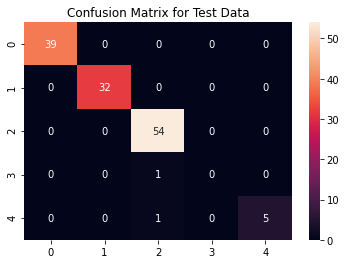

In [64]:
from sklearn import metrics 

#RandomForest
rfr = RandomForestClassifier(n_estimators=200,random_state=0)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

# Accuray On Test Data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy*100}%")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 100.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


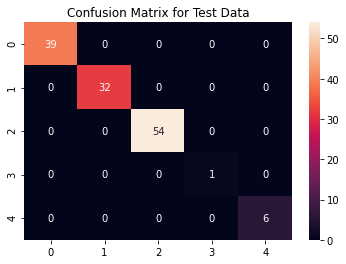

In [65]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

# Accuray On Test Data
dt_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy on Test Data: {accuracy*100}%")

kfold = model_selection.KFold(n_splits = 3,
                       random_state = 8)
  
# bagging classifier
model = BaggingClassifier(base_estimator = dt,
                          n_estimators = 100,
                          random_state = 8)
  
results = model_selection.cross_val_score(model, x_test, y_test, cv = kfold)

plt.figure()
sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on Test Data: 100.0%


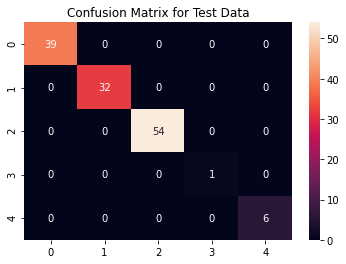

In [66]:
#SVM
from sklearn.svm import SVC
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()

Accuracy on NaiveBayes: 100.0%


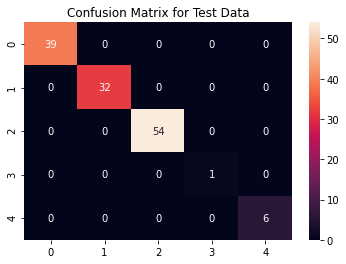

In [67]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
y_pred_values = NaiveBayes.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_values)
print(f"Accuracy on NaiveBayes: {accuracy*100}%")
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_values), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()